In [1]:
import pandas as pd
import numpy as np
house = pd.read_csv("../data/kc_house_data.csv")

In [2]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [5]:
house=house[["price","sqft_living"]]
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [6]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
y=house['price']
x=house[['sqft_living']]
lr=ols('price~sqft_living',data=house).fit()
y_pred=lr.predict(x)

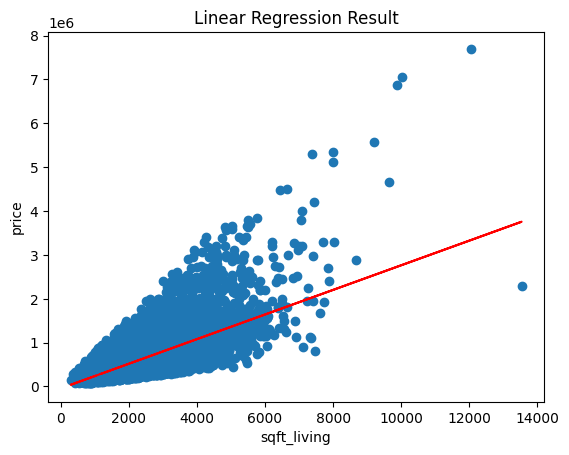

In [7]:
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.xlabel('sqft_living',fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()

In [8]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        10:39:35   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""